# Science Case 5

The phase and bandpass calibrators are included in the product tree of the pipeline results, but they cannot be found in the online query. We developed a shortcut of putting calibrators in another database, which could be queried much like the science queries, except there is only continuum available.

Stacking of calibrator maps has already resulted of interested results (Zwaan, priv.comm.)

The use of this notebook is not scientific, as we have no control over how the flux scale was determined (usually via a planet or a moon of a planet). With that caveat we are going to plot the flux as function of time for the calibrators we have available.

(reminder) In another notebook, we should check the flux of the continuum source in NGC3504, as we have several measurements in different projects.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
from astroquery.admit import ADMIT
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',25)


a = ADMIT('../admit.db')
a.check()

Found  ../admit.db
Checking db.... 0
header    : 103 entries
alma      : 103 entries
win       : 103 entries
lines     : 26 entries
sources   : 268 entries


In [3]:
source = 'NGC3504'
p = a.query(source_name_alma=source,nchan=1)
print(len(p))

kwargs  {'source_name_alma': 'NGC3504', 'nchan': 1}
select * from alma inner join win on (win.a_id = alma.id) inner join sources on (sources.w_id = win.id)   WHERE alma.target_name='NGC3504' AND win.nchan=1 AND sources.l_id = 0 
21


We collect the time, as well as peak and flux and the resolution

In [4]:
ci=['obs_id','spw','nsources','t_min', 'flux', 'peak_s','fop','bmaj_arcsec','smaj']
p['fop'] = p['flux']/p['peak_s']
p['bmaj_arcsec'] = p['bmaj'] * 3600
print(p[ci])

                   obs_id    spw  nsources         t_min     flux    peak_s  \
0   uid://A001/X1288/Xba6  spw21         1  58050.543677  0.00086  0.000151   
1   uid://A001/X1288/Xba8  spw19         1  58119.297186  0.00111  0.000512   
2   uid://A001/X1288/Xba8  spw21         1  58119.297186  0.00124  0.000580   
3   uid://A001/X1288/Xba8  spw23         1  58119.297186  0.00179  0.000594   
4   uid://A001/X1288/Xba8  spw25         1  58119.297186  0.00145  0.000706   
5    uid://A001/X87a/X706    ???         1  57713.452563  0.00173  0.001090   
6    uid://A001/X87a/X706    ???         1  57713.452563  0.00151  0.000968   
7    uid://A001/X87a/X706    ???         1  57713.452563  0.00156  0.001020   
8    uid://A001/X87a/X706    ???         1  57713.452563  0.00173  0.001260   
9    uid://A001/X87a/X708    ???         3  57830.136178  0.00770  0.002080   
10   uid://A001/X87a/X708    ???         3  57830.136178  0.01380  0.002040   
11   uid://A001/X87a/X708    ???         3  57830.13

It's a little surprising that flux/peak is 1.5  for the lowest and highest resolution array data, but there clearly is something odd about the middle resolution X708 data.

NOTE:  the ??? spw is some bug where something failed.   to be fixed

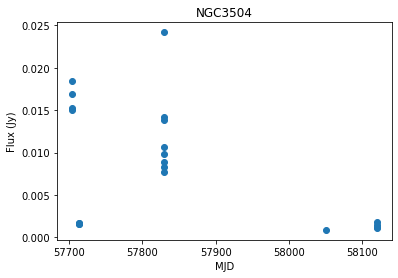

In [5]:
plt.scatter(p['t_min'],p['flux']);
plt.title(source)
plt.xlabel('MJD')
plt.ylabel('Flux (Jy)');

well, the fluxes are somewhat all over the place..... averaging around 15 mJy.

The other dataset of NGC3504 at mjd > 58000 seems to have lost a lot of flux.